In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import math

In [6]:
N = 100 # number of particles
xwidth = 10  # width of 10 particles in the x-direction
ywidth = N//xwidth  # width in the y-direction
a_av = 1  # average particle radius

k = 1  # repulsion coefficient
chi = 1  # rescaled translational viscosity
tau = 1  # characteristic time scale of repulsion
zeta = tau*k

labda_s = 0.04  # dimensionless parameter describing the strength of the self-propulsion
labda_a = 0.1  # alignment parameter
labda_n = 0.03  # noise parameter
labda_Fin = 0.3  # 
labda_Tin = 3  # 

F_self = labda_s*k*a_av  # self-propulsion force
F_in = labda_Fin*k*a_av  # inward boundary force
T_in = labda_Tin*k*chi*zeta  # inward boundary torque


xs = np.linspace(0, 2*(xwidth-1), xwidth)  # different initial x-positions
xpos = np.zeros(N)  # array to hold all x-positions
ys = np.linspace(0, 2*(ywidth-1), ywidth)  # different initial y-positions
ypos = np.zeros(N)  # array to hold all y-positions
a = np.zeros(N)  # array to hold all radii
psi = np.zeros(N)  # array to hold all directions
xi = np.zeros(N)  # array to hold all 'noise orientations'


In [7]:
# place the particles in a rectangular lattice and assign each particle a radius and initial direction

for i in range(0, xwidth):
    xpos[i::xwidth] = xs[i]

for i in range(0, ywidth):
    ypos[(xwidth*i):(i+1)*xwidth] = ys[i]

for i in range(0,N):  
    xpos[i] += np.random.uniform(-0.1, 0.1)  # giving the particles a small deviation from their original position
    ypos[i] += np.random.uniform(-0.1, 0.1)
    a[i] = np.random.normal(a_av, a_av/10) 
    psi[i] = np.pi/2 + np.random.uniform(-np.pi/2, np.pi/2)  # initially oriented along the y-axis (long edge for N > 100)


[  0.   2.   4.   5.   7.   8.   9.  19.  20.  30.  39.  49.  50.  70.  80.
  89.  90.  92.  95.  98.  99.]
[ 4.73298001  3.16012343  3.15203537  3.24800987  3.22118272  3.19166348
  4.59713226  3.24859253  3.17073277  3.1918034   3.23914772  3.14529814
  3.14696714  3.21298575  3.1867282   3.2110837   4.6671793   3.21901062
  3.22034471  3.19677134  4.69045174]
[-1.76920738 -1.90054801 -4.17602362  1.30295732  2.69202647 -2.60663579
  3.84667554  1.43957592  0.18995562  4.49794194  4.75827035 -1.57061479
  3.83621208  1.53556563 -1.04118895 -4.65045414 -6.31654781  6.11222441
 -9.03925405 -2.93102696  0.28154944 -3.29089516  5.31894856 -0.93034986
  2.08874874  0.08256925  4.48235894 -3.9519533   6.15658645  0.18577315
 -1.41362854  5.29382095 -4.83805617 -5.32882072  3.18069739  3.58002632
  1.33766468 -3.37056312  0.99689056 -0.91284422 -2.83751945 -3.61597908
  2.77796907  1.81650229 -7.57606325  6.29589397 -5.92684732 -3.33134667
  2.98087931  2.83462676  7.50326356 -3.74185581 -4

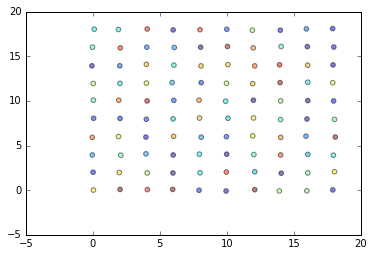

In [8]:
boundary = []
theta_out = []
mismatch = []

for i in range(0,N):
    xi[i] = np.random.uniform(-1,1)
    
    xdif_nb = []
    ydif_nb = []
    dist_nb = []
    radius = []
    orientation = []
    angles = []
    overlap = []
    
    # check if the particles are neighbours
    
    for j in range(0,N):  
        if i == j:
            continue
        xdif = xpos[i] - xpos[j]
        ydif = ypos[i] - ypos[j]
        dist = np.sqrt(xdif**2 + ydif**2)
        if dist < 2.7*a_av:
            xdif_nb = np.append(xdif_nb, xdif)
            ydif_nb = np.append(ydif_nb, ydif)
            dist_nb = np.append(dist_nb, dist)
            radius = np.append(radius, a[j])
            orientation = np.append(orientation, psi[j])
    
    # calculate the mismatch between neighbours for each particle
    
    delta_psi = 0
    for k in range(0, len(xdif_nb)):
        delta_psi += (orientation[k] - psi[i])
        
    mismatch = np.append(mismatch, delta_psi)
    
    # calculate the angle between neighbours in a clockwise direction
    
    for k in range(0, len(xdif_nb)):
        if ydif_nb[k] < 0:
            angle = math.acos(xdif_nb[k]/dist_nb[k])
        if ydif_nb[k] > 0:
            angle = np.pi + math.acos(-xdif_nb[k]/dist_nb[k])
        
        angles = np.append(angles, angle)
        
    # calculate the overlap between neighbours for each particle
    
    for k in range(0, len(xdif_nb)):
        if (a[i] + radius[k]) > dist_nb[k]:
            d = (a[i]**2 * math.acos((dist_nb[k]**2 + a[i]**2 - radius[k]**2) / (2*dist_nb[k]*a[i]))
                 + radius[k]**2 * math.acos((dist_nb[k]**2 - a[i]**2 + radius[k]**2) / (2*dist_nb[k]*radius[k]))
                 - 0.5*np.sqrt((-dist_nb[k] + a[i] + radius[k])*(dist_nb[k] + a[i] - radius[k])
                 *(dist_nb[k] - a[i] + radius[k])*(dist_nb[k] + a[i] + radius[k])))
        else:
            d = 0
    
        overlap = np.append(overlap, d)
        repulsion_angle = angles+np.pi
    
    sort_angles = np.sort(angles)  # sort the angles in order from smallest to largest

    # check wether or not one of the angles is larger than pi.
    # if so, the particle is at the boundary
    
    if (2*np.pi - (sort_angles[len(sort_angles)-1] - sort_angles[0])) > np.pi:
        boundary = np.append(boundary,i)
        theta_out = np.append(theta_out, (2*np.pi - (sort_angles[len(sort_angles)-1] - sort_angles[0])))
    else:
        for k in range(0, (len(sort_angles)-1)):
            if (sort_angles[(k+1)] - sort_angles[k]) > np.pi:
                boundary = np.append(boundary,i)  
                theta_out = np.append(theta_out, (sort_angles[(k+1)] - sort_angles[k]))

print(boundary)
print(theta_out)
print(mismatch)
        
alpha = a[0]/a_av  # normalized radii
area = np.pi*a[0]**2
colors = np.random.rand(N)

plt.scatter(xpos, ypos, s=10*area, c=colors, alpha=0.5)
plt.show()
